# 🌍 EU27 vs US: Nuclear, Renewables, and Shale Gas Analysis / Nükleer, Yenilenebilir ve Kaya Gazı Analizi

English: This notebook compares EU27 and US across nuclear, renewables, and shale (natural) gas.

Türkçe: Bu notebook, EU27 ve ABD için nükleer, yenilenebilir ve kaya gazı (doğal gaz) karşılaştırmasını sunar.


In [1]:
# Setup / Kurulum
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['font.size'] = 10
sns.set_theme(style='whitegrid', palette='husl')

print('✅ Libraries ready / Kütüphaneler hazır')


✅ Libraries ready / Kütüphaneler hazır


In [8]:
# Load processed data (robust path) / İşlenmiş veriyi yükle (sağlam yol)
proc_candidates=[Path.cwd()/ 'data/processed/eu_us_energy.csv', Path.cwd().parent/ 'data/processed/eu_us_energy.csv']
proc_path=next((p for p in proc_candidates if p.exists()), None)
assert proc_path is not None, f'Processed data not found: {proc_candidates}'
df=pd.read_csv(proc_path)
df['year']=pd.to_numeric(df['year'], errors='coerce')
df=df.dropna(subset=['year'])
modern_df=df[df['year']>=1990].copy()
print('📊 Processed loaded:',len(df),'records, years:',int(df.year.min()),'-',int(df.year.max()))
df.head()
df.tail()

📊 Processed loaded: 250 records, years: 1900 - 2024


,region,year,nuclear_share_energy,renewables_share_energy,fossil_share_energy,low_carbon_share_energy,primary_energy_consumption
245,US,2020,8.388,10.123,81.489,18.511,24630.395
246,US,2021,7.834,10.116,82.050,17.950,25956.828
247,US,2022,7.573,10.875,81.552,18.448,26512.510
248,US,2023,7.641,11.212,81.147,18.853,26216.545
249,US,2024,7.619,12.050,80.330,19.670,26528.611


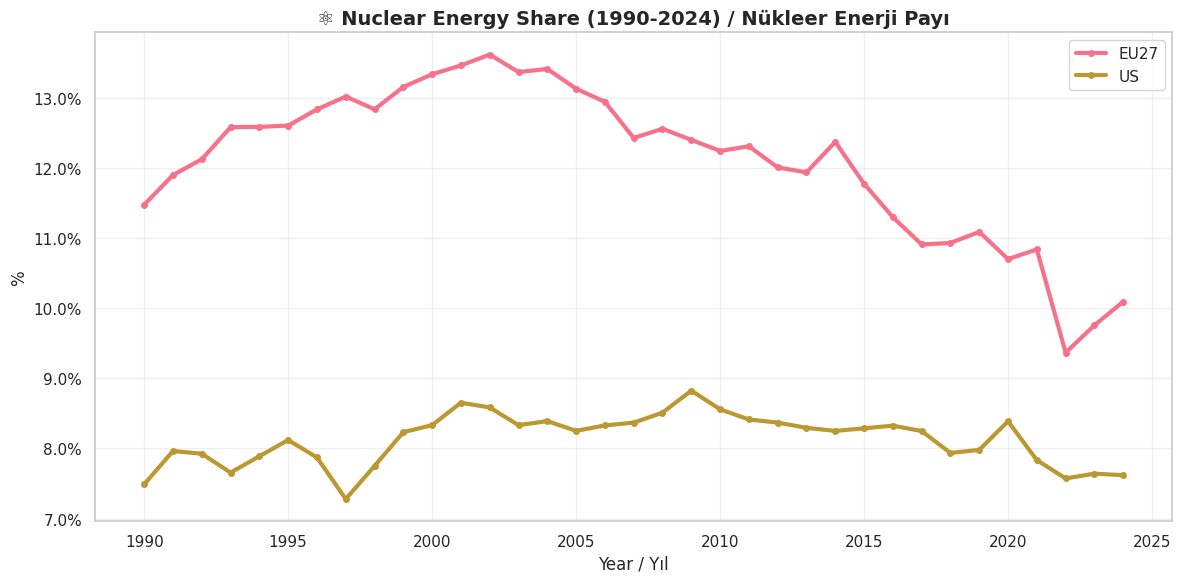

In [3]:
# Nuclear trend / Nükleer trend
fig,ax=plt.subplots(figsize=(12,6))
for region in ['EU27','US']:
    d=modern_df[modern_df.region==region]
    ax.plot(d.year,d.nuclear_share_energy,label=region,linewidth=3,marker='o',markersize=4)
ax.set_title('⚛️ Nuclear Energy Share (1990-2024) / Nükleer Enerji Payı',fontsize=14,fontweight='bold')
ax.set_ylabel('%')
ax.set_xlabel('Year / Yıl')
ax.grid(True,alpha=0.3); ax.legend();
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{x:.1f}%'))
plt.tight_layout(); plt.show()


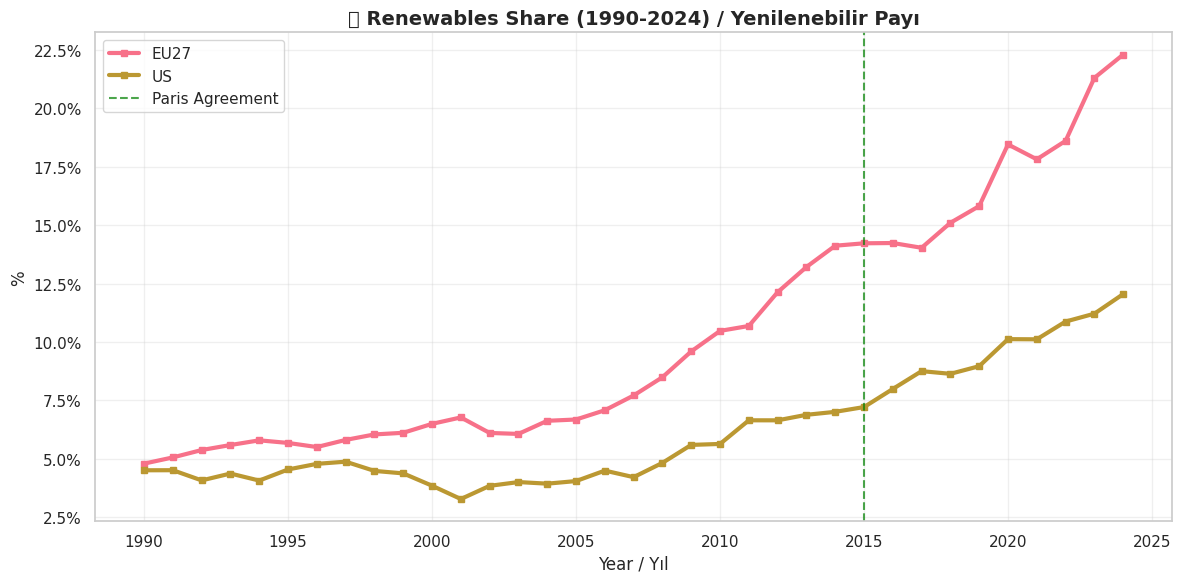

In [4]:
# Renewables trend / Yenilenebilir trend
fig,ax=plt.subplots(figsize=(12,6))
for region in ['EU27','US']:
    d=modern_df[modern_df.region==region]
    ax.plot(d.year,d.renewables_share_energy,label=region,linewidth=3,marker='s',markersize=4)
ax.axvline(2015,color='green',linestyle='--',alpha=0.7,label='Paris Agreement')
ax.set_title('🌱 Renewables Share (1990-2024) / Yenilenebilir Payı',fontsize=14,fontweight='bold')
ax.set_ylabel('%')
ax.set_xlabel('Year / Yıl')
ax.grid(True,alpha=0.3); ax.legend();
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{x:.1f}%'))
plt.tight_layout(); plt.show()


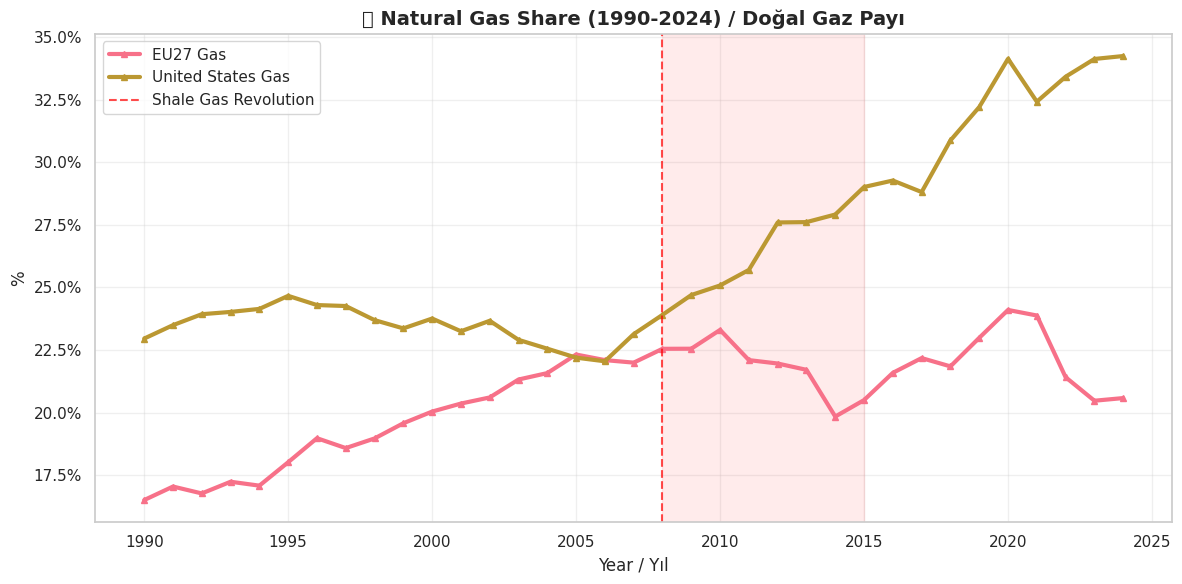

In [5]:
# Gas (as proxy for shale) / Gaz (kaya gazı için vekil)
raw_candidates=[Path.cwd()/ 'data/raw/owid-energy-data.csv', Path.cwd().parent/ 'data/raw/owid-energy-data.csv']
raw_path=next((p for p in raw_candidates if p.exists()), None)
assert raw_path is not None, f'Raw data not found: {raw_candidates}'
rdf=pd.read_csv(raw_path)
rdf['year']=pd.to_numeric(rdf['year'], errors='coerce')
rdf=rdf.dropna(subset=['year'])
gas=rdf[rdf.country.isin(['European Union (27)','United States'])].rename(columns={'country':'region'})
gas.loc[gas.region=='European Union (27)','region']='EU27'
gmod=gas[gas.year>=1990].copy()
fig,ax=plt.subplots(figsize=(12,6))
for region in gmod.region.unique():
    g=gmod[(gmod.region==region) & (gmod.gas_share_energy.notna())]
    if len(g)>0:
        ax.plot(g.year,g.gas_share_energy,label=f'{region} Gas',linewidth=3,marker='^',markersize=4)
ax.axvline(2008,color='red',linestyle='--',alpha=0.7,label='Shale Gas Revolution')
ax.axvspan(2008,2015,color='red',alpha=0.08)
ax.set_title('⛽ Natural Gas Share (1990-2024) / Doğal Gaz Payı',fontsize=14,fontweight='bold')
ax.set_ylabel('%')
ax.set_xlabel('Year / Yıl')
ax.grid(True,alpha=0.3); ax.legend();
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,_: f'{x:.1f}%'))
plt.tight_layout(); plt.show()


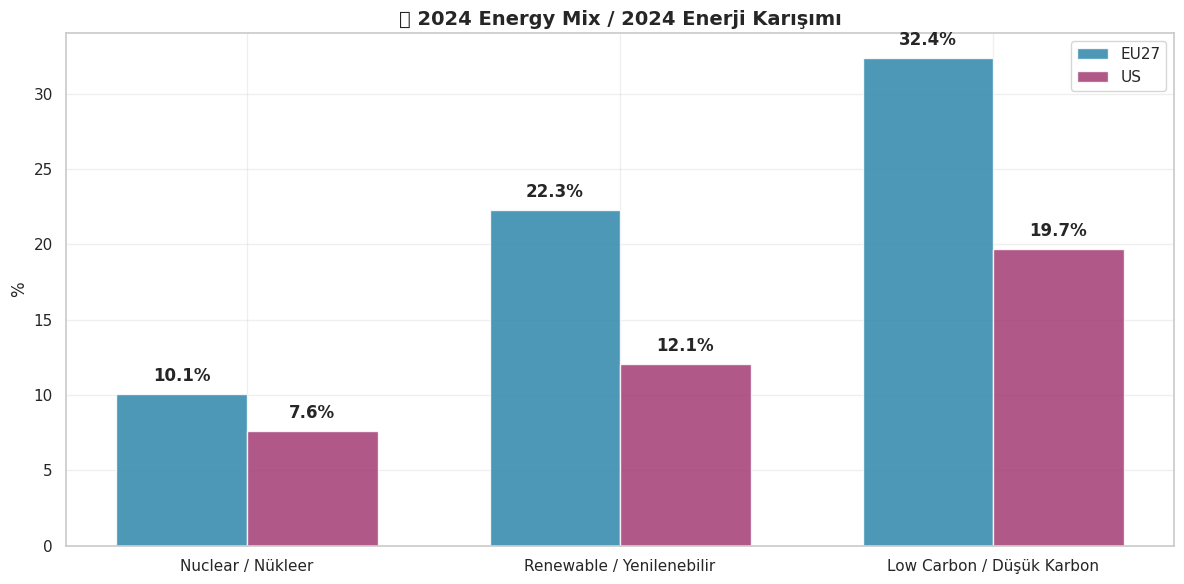

In [6]:
# 2024 comparison / 2024 karşılaştırma
latest=modern_df[modern_df.year==2024]
cats=['Nuclear / Nükleer','Renewable / Yenilenebilir','Low Carbon / Düşük Karbon']
eu=[float(latest[latest.region=='EU27'].nuclear_share_energy), float(latest[latest.region=='EU27'].renewables_share_energy), float(latest[latest.region=='EU27'].low_carbon_share_energy)]
us=[float(latest[latest.region=='US'].nuclear_share_energy), float(latest[latest.region=='US'].renewables_share_energy), float(latest[latest.region=='US'].low_carbon_share_energy)]
x=np.arange(len(cats)); w=0.35
fig,ax=plt.subplots(figsize=(12,6))
b1=ax.bar(x-w/2,eu,w,label='EU27',color='#2E86AB',alpha=0.85)
b2=ax.bar(x+w/2,us,w,label='US',color='#A23B72',alpha=0.85)
ax.set_title('📊 2024 Energy Mix / 2024 Enerji Karışımı',fontsize=14,fontweight='bold')
ax.set_ylabel('%'); ax.set_xticks(x); ax.set_xticklabels(cats); ax.legend(); ax.grid(True,alpha=0.3)
for bars in (b1,b2):
    for bar in bars:
        h=bar.get_height(); ax.text(bar.get_x()+bar.get_width()/2,h+0.6,f'{h:.1f}%',ha='center',va='bottom',fontweight='bold')
plt.tight_layout(); plt.show()


In [7]:
# Summary / Özet
print('📋 SUMMARY / ÖZET')
print('- EU27 renewables higher; ABD shale gas etkisiyle gaz payı artmış.')
print('- 2024: EU27 low-carbon > US; US nuclear istikrarlı.')
print('- Policy: EU27 renewables & efficiency; US shale tech & standards.')


📋 SUMMARY / ÖZET
- EU27 renewables higher; ABD shale gas etkisiyle gaz payı artmış.
- 2024: EU27 low-carbon > US; US nuclear istikrarlı.
- Policy: EU27 renewables & efficiency; US shale tech & standards.
